# Introducción a Python para IA.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">Introducción a Python para IA</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

# Probabilidad y estadística

Cuando hablamos de estadísitica, inevitablemente también debemos referirnos también a la probabilidad.

La probabilidad contiene un mundo de teorías, que pueden ser complicadas, pero que tienen aplicación en la vida real.

En el nivel más básico nos preguntamos: ¿Cuál es la probabilidad de que un evento suceda?

Para calcular esta probabilidad, es necesario considerar todos los demás eventos que también podrían ocurrir.

Dos ejemplos clásicos son el lanzamiento de una moneda o de un dado. En el primero pueden ocurrir solo dos eventos (en México decimos Águila o Sol), el segundo pueden ocurrir seis. A esto se le conoce como espacio muestral. 

Para calcular la probabilidad de que un evento ocurra, contamos las posibilidades de que realmente ocurra y dividimos el resultado entre el tamaño del espacio muestral. De esta manera en el caso del lanzamiento de una moneda tenemos un $50\%$ de que ocurra uno de los eventos (la mitad Águila, la otra mitad Sol). En el caso del dado la probabilidad es de $16.6\%$ ($1/6$). 

Observando los eventos que pueden ocurrir, la probabilidad nos proporciona un sistema para realizar predicciones de qué tan frecuente un evento puede ocurrir.

Sin embargo, en la realidad puede pasar que cuando lances la moneda, en vez de obtener la mitad de Águila y la otra mitad de Sol, te encuentres con que la mayoría de las veces cae, por ejemplo Sol (y entonces pienses que la moneda está "cargada").

Pero, regularmente el número de lanzamientos no es lo suficientemente grande para poder hacer esta suposición (me están haciendo trampa); lo que debes hacer para evitar pensar mal, es lanzar muchas veces la moneda (10, 100, 1000, ...) y empezar a recopilar datos; y luego usar la estadística para calcular las probabilidades con base en tus observaciones y checar que realmente se obtiene lo esperado (50-50, en el caso del lanzamiento de la moneda).

Veamos el siguiente ejemplo:

In [72]:
import random
import math

def lanzamiento(n):
    sol = 0
    aguila = 0
    for i in range(n):
        resultado = random.random()
        if resultado <= 0.5:
            sol += 1
        else:
            aguila +=1

    return aguila/n, sol/n

In [73]:
lanzamiento(10000)

(0.5073, 0.4927)

Observa que el error con respecto del resultado ideal (50-50) se desvanece conforme aumentamos el número de lanzamientos. Podemos calcular una *desviación* con respecto del resultado esperado:

In [93]:
a, s = lanzamiento(1000)

print('Águila : {:.2f} ({:.2f}) \t Sol : {:.2f} ({:.2f})'.format(a, math.fabs(a-0.5), s, math.fabs(s-0.5)))

Águila : 0.51 (0.01) 	 Sol : 0.49 (0.01)


Entonces, la estadística nos permite calcular probabilidades a partir de observaciones del mundo real, siempre y cuando tengamos suficientes datos (*Big Data*).

La probabilidad nos proporciona las teorías, mientras que la estadística nos provee de herramientas para probar esas teorías usando datos, particularmente a través de la media y la desviación estándar. 

Acabamos de demostrar lo anterior con el ejemplo del lanzamiento de una moneda, pero esto se puede aplicar a ejemplos que son mucho más complejos: 
* ¿Cuál es la probabilidad de que un meteorito caiga en el patio de mi casa? 
* ¿Cuál es la probabilidad de que me saque la lotería? 
* ¿Cuál es la probabilidad de que mi equipo favorito sea campeón? 

No es fácil responder a estas preguntas, a menos que tengamos mucha información, datos duros, para calcular estadísticas. Y entre más datos tengamos, nuestra confianza en esos cálculos será mayor.

## Variables aleatorias.

Pero antes de comenzar a realizar cálculos estadísticos, tenemos que revisar ¿cuál es la naturaleza de nuestros datos?

Nos referimos en este punto a las [**variables aleatorias**](https://es.wikipedia.org/wiki/Variable_aleatoria) como funciones que asignan un valor, usualmente numérico, al resultado de un experimento aleatorio. Lo que quiere decir que son los resultados que se presentan al azar en cualquier evento o experimento. Tenemos dos tipos:

### Variable aleatoria discreta. 

Es aquella que solo toma ciertos valores (frecuentemente enteros) y que resulta principalmente del conteo realizado.  Una variable aleatoria discreta $X$ está definida por los valores que toma y sus probabilidades, las cuales deberán sumar 1.

| $X$   | $P(X=x_i)$ |
|-------|:----------:|
|$x_1$  | $p_1$ |
|$x_1$  | $p_2$ |
|$\dots$| $\dots$ |
|$x_n$  | $p_n$ |

Se debe verificar que $\sum_i p_i = 1$.

**Ejemplo 1**. El experimento de lanzar dos monedas tiene los siguientes resultados (espacio muestral): 

$$
\Omega = \{ \text{(Águila, Águila), (Águila, Sol), (Sol, Sol), (Sol, Águila)} \}
$$

Definimos la variable aleatoria $X$ cómo el número de veces que cae $\text{Águila}$. Podemos escribir $X: \Omega \rightarrow R_X$ tal que:

$$
\begin{array}{ccccc}
 \text{(Águila, Águila)} & \text{(Águila, Sol)} & \text{(Sol, Sol)} & \text{(Sol, Águila)} \\
\downarrow & \downarrow & \downarrow & \downarrow \\
 2 & 1 & 0 & 1 
\end{array}
$$

Entonces, nuestra distribución de probabilidades (discreta) es:

| $X$   | $P(X=x_i)$ |
|-------|:-----------:|
|$0$  | $0.25$ |
|$1$  | $0.50$ |
|$2$  | $0.25$ |

### Variable aleatoria continua. 

Es aquella que resulta generalmente de la medición y puede tomar cualquier valor dentro de un intervalo dado. Este tipo de variables están caracterizadas por una [**función de densidad de probabilidad**](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad), que es una generalización de la distribución de probabilidad del caso discreto.

**Ejemplo 2.**
Considera el siguiente experimento: si nos paramos en una avenida y preguntamos a las mujeres su estatura, obtendremos resultados dentro de un intervalo bien definido $[e_{min}, e_{max}]$. El valor de esta variable puede ser cualquiera dentro de este intervalo (no es fácil contarlo). Tenemos entonces una variable aleatoria continua.

## Espacio muestral y sesgo.

La mayoría de los resultados en estadística que se obtienen de una población general, se extraen a partir del estudio de una [**muestra**](https://es.wikipedia.org/wiki/Muestra_estad%C3%ADstica) de esta población. 

Una muestra es un subconjunto de casos o individuos de una población. Es importante que la muestra sea representativa, pues
si la muestra está **sesgada** tendrá poco interés y su utilidad será limitada. El [**sesgo**](https://es.wikipedia.org/wiki/Sesgo) es un peso desproporcionado a favor o en contra de una cosa, persona o grupo en comparación con otra, generalmente de una manera que se considera injusta. Muchas veces los sesgos provienen de contextos culturales. 

## Distribución de probabilidad.

El proceso de determinar resultados, esto es, llegar a ciertas conclusiones a través de la estadística, a partir de una muestra no sesgada de la población general, se conoce como [**inferencia estadística**](https://es.wikipedia.org/wiki/Estad%C3%ADstica_inferencial). Las inferencias se basan con frecuencia en hacer suposiciones acerca de la forma en que los datos se distribuyen. Esta forma se conoce como [**distribuciones de probabilidad**](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de una variable aleatoria, y es una función que asigna a cada suceso definido sobre la variable, la probabilidad de que dicho suceso ocurra. 

### Distribuciones discretas

Si la variable aleatoria es discreta (números enteros): la distribución será discreta.

#### [Distribución binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) (eventos independientes).
$$
P(k) =  \binom{n}{k} p^k q^{n-k} = \frac{n!}{k!(n-k)!}p^k q^{n-k}
$$
donde $n$ es el número de muestras, $k \in [0, 1, \dots, n]$ el número de éxitos, $0 \leq p \leq 1$ probabilidad de éxito, $q = 1 - p$ probabilidad de falla.

In [146]:
import scipy
import matplotlib.pyplot as plt

In [176]:
scipy.stats.binom.ppf(1, 10000, 0.99)

10000.0

In [167]:
x = np.arange(scipy.stats.binom.ppf(0.01, n, p),
              scipy.stats.binom.ppf(0.99, n, p))
x

array([0., 1., 2.])

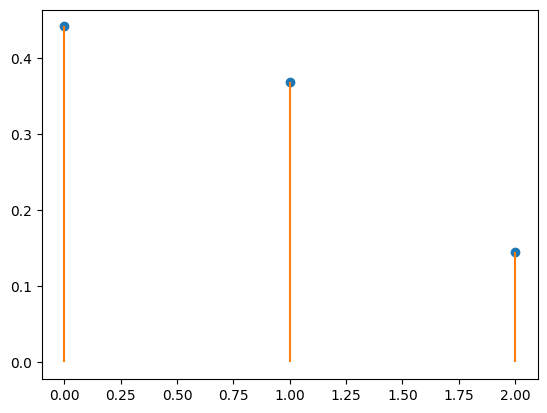

In [160]:
n = 20
p = 0.04

X = scipy.stats.binom(n,p)

x = np.arange(scipy.stats.binom.ppf(0.01, n, p),
              scipy.stats.binom.ppf(0.99, n, p))

pmf = X.pmf(x)

plt.scatter(x,pmf)
plt.vlines(x,0,pmf, color='C1')
plt.show()


    - [Distribución de Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) (eventos independientes).
    - [Distribución hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica) (eventos dependientes).

* Variable aleatoria continua (números reales): la distribución que se generará será una distribución continua y las principales son:
    - [Distribución normal o gaussiana](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal).
    - [Distribución de Cauchy](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Cauchy).
    - [Distribución exponencial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_exponencial).




### Distribución normal

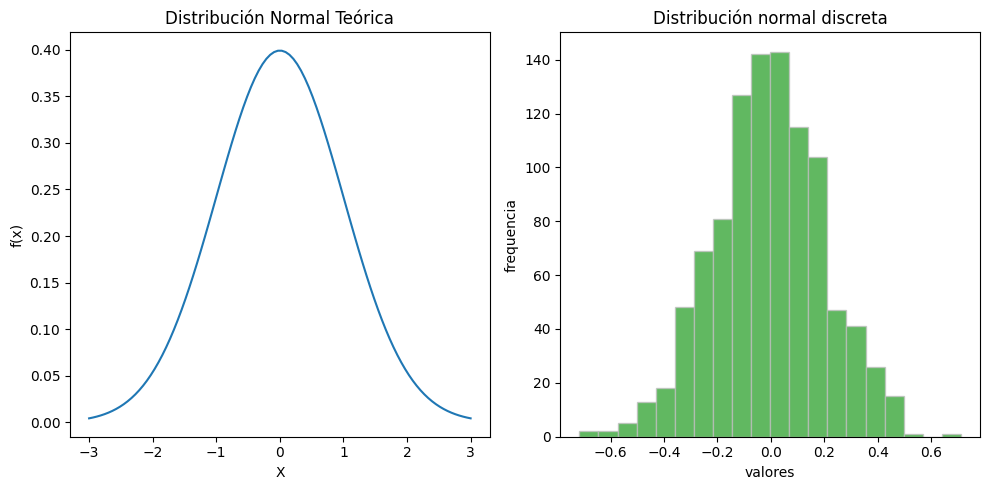

In [107]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


x  = np.linspace(-3,3,100)
# Calcula los valores de la función de densidad de probabilidad para x
y = norm.pdf(x)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x, y)  # Crea el objeto gráfico
plt.title('Distribución Normal Teórica')  # Título del gráfico
plt.ylabel('f(x)')  # Título del eje y
plt.xlabel('X')  # Título del eje x

# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

plt.subplot(122)
# histograma de distribución normal.
plt.hist(datos, 20, fc='C2', ec='silver', alpha=0.75)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Distribución normal discreta')

plt.tight_layout()
plt.show()

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Teorema de Límite Central

independientemente de la forma de la población, la forma de la distribución muestral de la media se aproxima a una curva normal,  si el tamaño de la muestra es lo suficientemente grande.

In [2]:
def data_set(sesgo, cantidad, maximo):
    datos_aleatorios = stats.skewnorm.rvs(sesgo, size=cantidad, random_state=1)
    return datos_aleatorios

In [3]:
dat1 = data_set(10, 10000, 100)

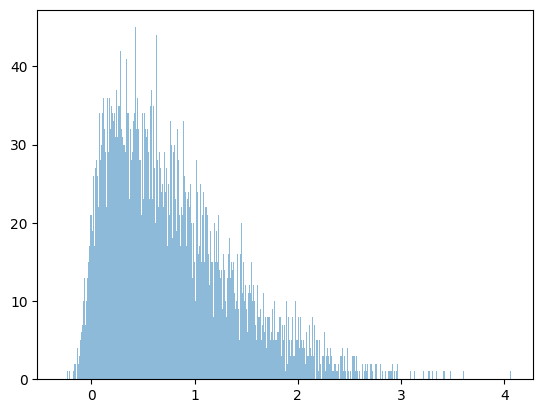

In [4]:
plt.hist(dat1, bins=1000, alpha=0.5)
plt.show()

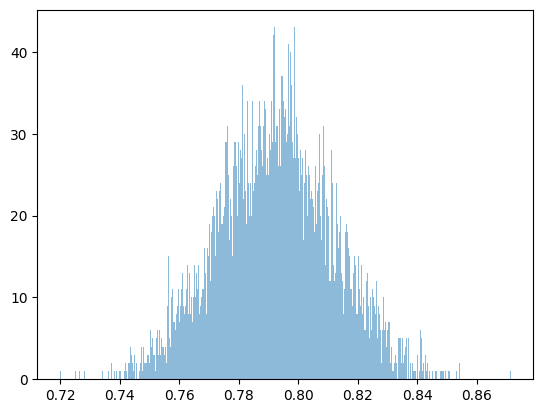

In [5]:
tam_muestra = [1,2,3,5,10,100,1000,10000]
num_muestra = 10000

prom = np.array([])
for i in range(num_muestra):
    prom = np.append(prom, np.random.choice(dat1, 1000).mean())
    
plt.hist(prom, bins=1000, alpha=0.5)
plt.show()

Por otro lado, la [**función de densidad de probabilidad**](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) de una variable aleatoria continnua, describe la probabilidad relativa según la cual una variable tomará un determinado valor. La probabilidad de que la variable aleatoria caiga en una región específica del espacio de posibilidades estará dada por la integral de la densidad de esta variable entre uno y otro límite de dicha región.

La función de densidad de probabilidad (PDF por sus siglas en inglés) es positiva a lo largo de todo su dominio y su integral sobre todo el espacio es de valor unitario. 